In [1]:
from PIL import Image
from numpy import *
from pylab import *

In [2]:
from scipy import ndimage

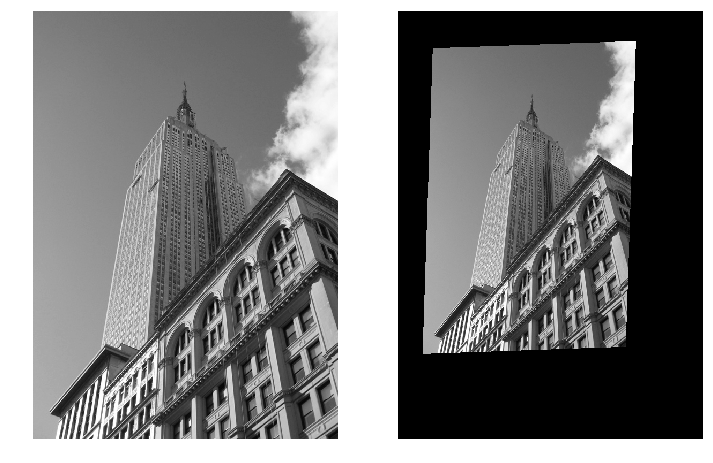

In [3]:
im = array(Image.open('empire.jpg').convert('L'))
H = array([[1.4, 0.05, -100], [0.05, 1.5, -100], [0, 0, 2]])
im2 = ndimage.affine_transform(im, H[:2, :2], (H[0,2],H[1,2]))

figure(figsize=(12, 12))
gray()
subplot(1, 2, 1)
imshow(im)
axis('off')
subplot(1, 2, 2)
imshow(im2)
axis('off')
show()

In [4]:
import cv2

In [5]:
H4 = inv(H)
H4[:, 2] = H4[:, 2]/H4[2, 2]

In [6]:
im3 = cv2.warpAffine(im.T, H4[:2, :3], im.shape)

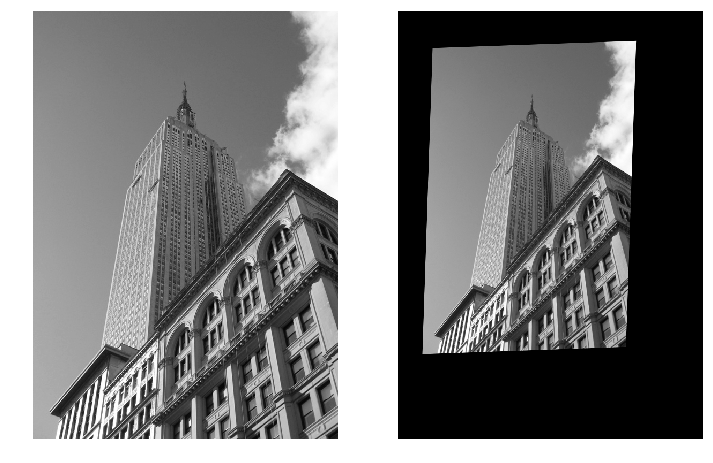

In [7]:
figure(figsize=(12, 12))
gray()
subplot(1, 2, 1)
imshow(im)
axis('off')
subplot(1, 2, 2)
imshow(im3.T)
axis('off')
show()

In [42]:
im1 = array(Image.open('cat.jpg').convert('L'))
im2 = array(Image.open('blank_billboard.jpg').convert('L'))

In [43]:
tp = array([[143, 353, 302, 50],[100,30,980,922],[1,1,1,1]])
m, n = im1.shape[:2]
fp = array([[0,m,m,0],[0,0,n,n],[1,1,1,1]])

In [44]:
pts1 = fp.T[:, 1::-1].astype(float32)
pts2 = tp.T[:, 1::-1].astype(float32)
print pts1
print pts2

[[   0.    0.]
 [   0.  334.]
 [ 500.  334.]
 [ 500.    0.]]
[[ 100.  143.]
 [  30.  353.]
 [ 980.  302.]
 [ 922.   50.]]


In [45]:
M = cv2.getPerspectiveTransform(pts1, pts2)

In [57]:
im3 = cv2.warpPerspective(im1, M, im2.shape[::-1])

In [62]:
alpha = 1.0*(im3==0)
im4 = im2*alpha + im3

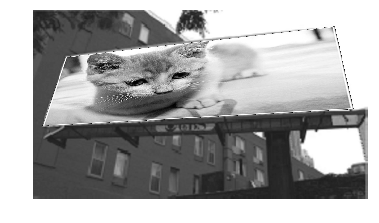

In [63]:
figure()
imshow(im4)
axis('off')
show()

In [54]:
print im3>0

[[False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]
 ..., 
 [False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]]
